In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib




## Task-1
Write a function that will take as input the following: 
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$. 
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5
1. Comment


In [34]:
def task1(x0,alpha,n_iter):
    list = [x0]
    x = x0
    for iter in range(n_iter):
        x =  alpha*(x)*(1-x)
        list.append(x)
    return list

def lm(x,alpha):
    return alpha*(x)*(1-x)
    

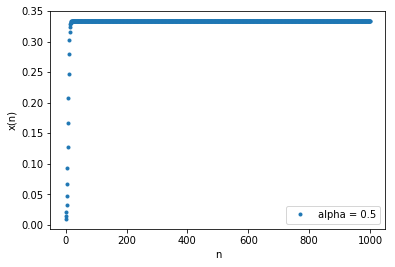

In [12]:
l1 = task1(0.01,1.5,1000)
plot(l1,".",label="alpha = 0.5")
xlabel("n")
ylabel("x(n)")
legend()

****
<a id='lesson-2'></a>
# Lesson-2: Logistic Map
****

## Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.

## Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial. 
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems. 

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map

In [13]:
l1[-1]

0.33333333333333337

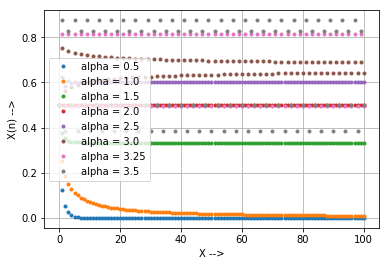

In [28]:
figure()
i = 0
for alpha in [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5]:
    l1 = task1(0.5,alpha,100)
    plot(l1,".",label = "alpha = " + str(alpha))
xlabel("X -->")
ylabel("X(n) -->")
legend()
grid()

In [ ]:
figure()
x0 = 0.5
n_iter = 100
av = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5]
for i in range(1,9):
    subplot(2,4,i)
    task1


## Task-2
1. Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps. Note fixed points are given by $f(x) = x $
2. Use `scipy.optimizie.fixed_point` to find the fixed points  for given $\alpha$

In [32]:
#plot 8 different parabolas for different values of alpha

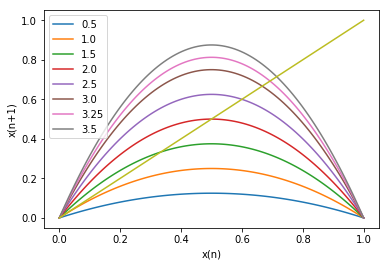

In [41]:
xv = linspace(0,1,100)
av = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5]
for a in av:
    plot(xv,lm(xv,a),label=str(a))
plot([0,1],[0,1]) #plot takes two lists [x1,x2..],[y1,y2..]
xlabel("x(n)")
ylabel("x(n+1)")
legend()

for alpha = 0 to 1
    theres only 1 intersection (x=0)
    derivitive is less than 1
    so x=0 is a stable fixed point
aplha > 1 
    there are more than 1 intersection values
    map is above the line => unstable fixed point
    the other fixed point, derivative is less thn 1 => stable fixed point
    consider alpha = 3.25
        slope is -ve but it's mag > 1
        so both are unstable
    consider alpha = 3.5
        there is 2nd bifurcation
        "look at fof(x)


STABILITY OF POINT
    f(x*) = x*
    f(x* + del) = x* + e
        |e| < |del|
            if a fixed point has this, it's a stable fixed point
            abolsulte value of derivitive is less than 1
        |e| > |del|
            you are moving away from this point"
            abolsulte value of derivitive is greater than 1
        |e| = |del|
            "moving in a hypersphere around the point"

##### 


## Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$. For this we have to consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$ and find fixed points of $f^n(x)$.

### Strategy to solve this task: to find the steady-state or cycle for a given $\alpha$
1. Find roots of $f^{(n)}-x=0$, where $f^{(n)}$ is the $n^{th}$ iteration of the map; i.e. $f^{(3)}(x)=f(f(f(x)))$
2. Check the stability of the roots. 
1. If all roots are unstable, then increase n by 1 and goto step 1
1. If even one root is stable, then we have found the steady-state/cycle.

Alternatively: 
$ \frac{d}{dx} f^{(n)}(x) = \frac{df(x_{n-1})}{dx}  \frac{d}{dx} f^{(n-1)}(x)  = \left[\alpha (1-2 x_{n-1})\right] \frac{d}{dx} f^{(n-1)}(x_{n-1}) $, which is a recursive formula for the derivative!

\begin{eqnarray}
\text{ Denote } x_n &= f^{(n)}(x) \\
\frac{d}{dx} f^{(n)}(x) & = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) =
                     \left[\alpha (1-2 x_{(n-1)})\right] \frac{d}{dx} x_{(n-1)} \\
 \text{ with } x_0 = x \implies \frac{d}{dx} x_0 = 1
\end{eqnarray}

$$ \frac{d}{dx} f^{(n)}(x)  = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) = f^\prime(x_{(n-1)}) \frac{d}{dx} x_{(n-1)} \text{ where }f^\prime(x)=\alpha (1-2x) \text{ and }\frac{d}{dx}x_0 = 1$$

So that $$\frac{d}{dx} f^{(n)}(x) = f^\prime(x_{n-1})~f^\prime(x_{n-2})~\cdots f^\prime(x_{2})~ f^\prime(x_{1})~f^\prime(x_0)\text{ where }x_0=x\text{ and }x_n=f^{(n)}(x_0)$$
and use `scipy.optimize.fixed_point`


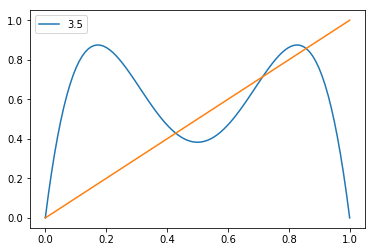

In [56]:
#plot f(f(x)) vs x
a = 3.5
plot(xv,lm(lm(xv,a),a), label = str(a))
plot(xv,xv)
legend()


## Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.


## Task-5
Find the ratio between two consequtive bifurcations.